# Parcial 2

Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

In [193]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture  
from sklearn.metrics import silhouette_score  
from sklearn.decomposition import PCA  
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# 1. Dataset de Coactivation matrix
* Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
* Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

### 1.A

In [6]:
path_coact = r"Coactivation_matrix.mat"
mat = scipy.io.loadmat(path_coact)
matrix = mat["Coactivation_matrix"] 

In [7]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(matrix)

In [9]:
inertia = []
for no_clusters in range(2, 15): 
    kmeans = KMeans(n_clusters=no_clusters, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

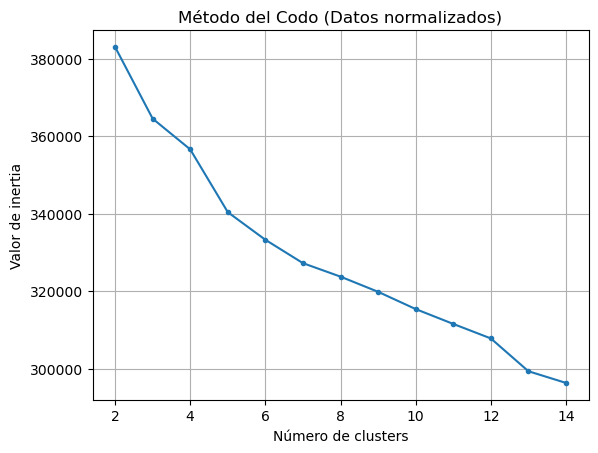

In [22]:
plt.plot(range(2, 15), inertia, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del Codo (Datos normalizados)')
plt.grid(True)
plt.show()

In [11]:
inertia1 = []
for no_clusters in range(2, 15): 
    kmeans = KMeans(n_clusters=no_clusters, random_state=42)
    kmeans.fit(matrix)
    inertia1.append(kmeans.inertia_)

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

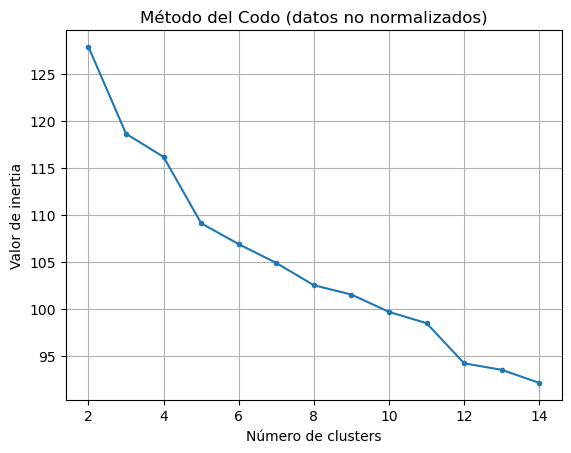

In [24]:
plt.plot(range(2, 15), inertia1, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del Codo (datos no normalizados)')
plt.grid(True)
plt.show()

* Número de clúster óptimo: 3, 4, 5

### 1. B

In [15]:
n_clusters_optimo_3 = 3
n_clusters_optimo_4 = 4
n_clusters_optimo_5 = 5

In [16]:
matrix_2d = matrix.reshape(matrix.shape[0], -1)

In [17]:
kmeans3 = KMeans(n_clusters=n_clusters_optimo_3)
kmeans3.fit(X_std)

df_std = pd.DataFrame(X_std)
labels_coac_mat = kmeans3.labels_

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [32]:
Coord = mat['Coord']

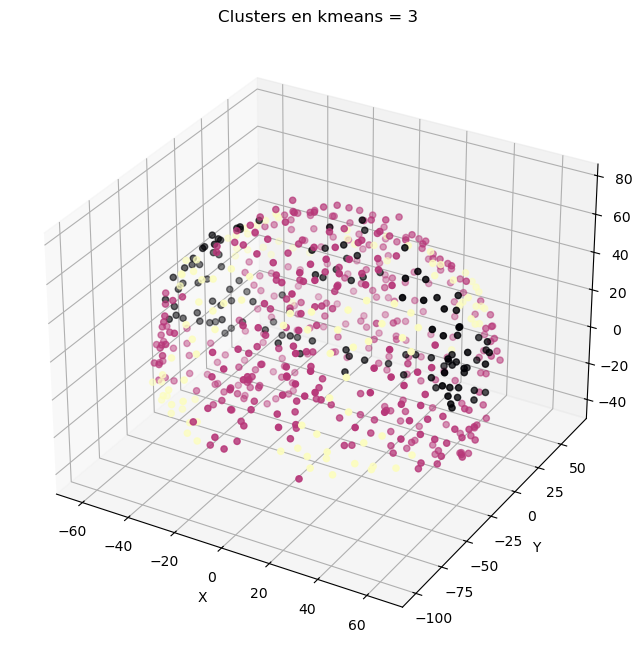

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=kmeans3.labels_, cmap='magma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters en kmeans = 3')
plt.show()

In [44]:
kmeans4 = KMeans(n_clusters=n_clusters_optimo_4)
kmeans4.fit(X_std)

df_std = pd.DataFrame(X_std)
labels_coac_mat = kmeans4.labels_

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


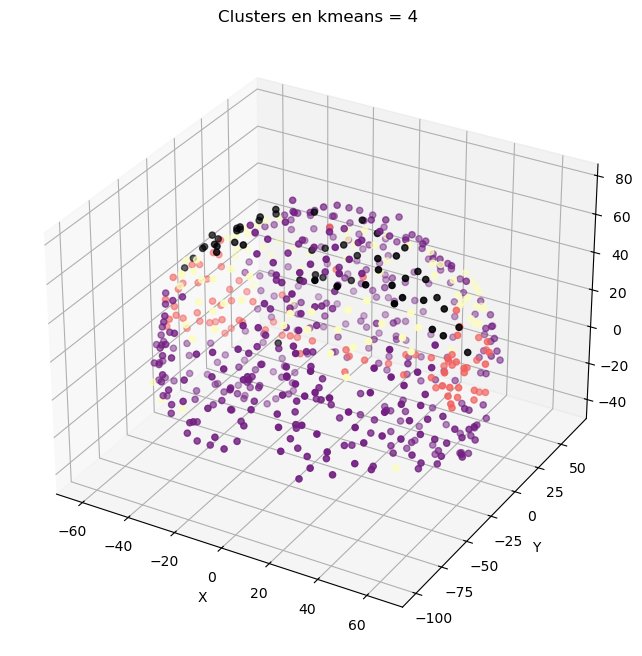

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=kmeans4.labels_, cmap='magma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters en kmeans = 4')
plt.show()

In [50]:
kmeans5 = KMeans(n_clusters=n_clusters_optimo_5)
kmeans5.fit(X_std)

df_std = pd.DataFrame(X_std)
labels_coac_mat = kmeans5.labels_

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


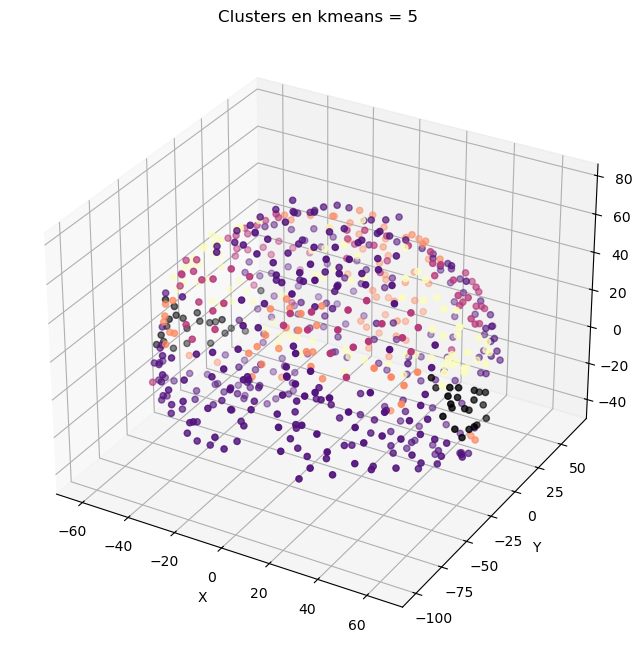

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=kmeans5.labels_, cmap='magma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters en kmeans = 5')
plt.show()

In [60]:
gmm3 = GaussianMixture(n_components=n_clusters_optimo_3)
gmm3.fit(X_std)

labels_gmm3 = gmm3.predict(X_std)

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


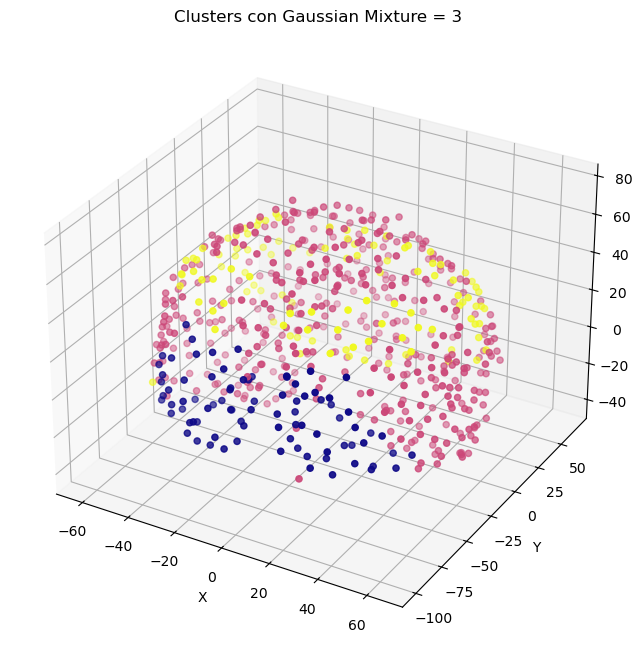

In [64]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=labels_gmm3, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters con Gaussian Mixture = 3')
plt.show()

In [66]:
gmm4 = GaussianMixture(n_components=n_clusters_optimo_4)
gmm4.fit(X_std)

labels_gmm4 = gmm4.predict(X_std)

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


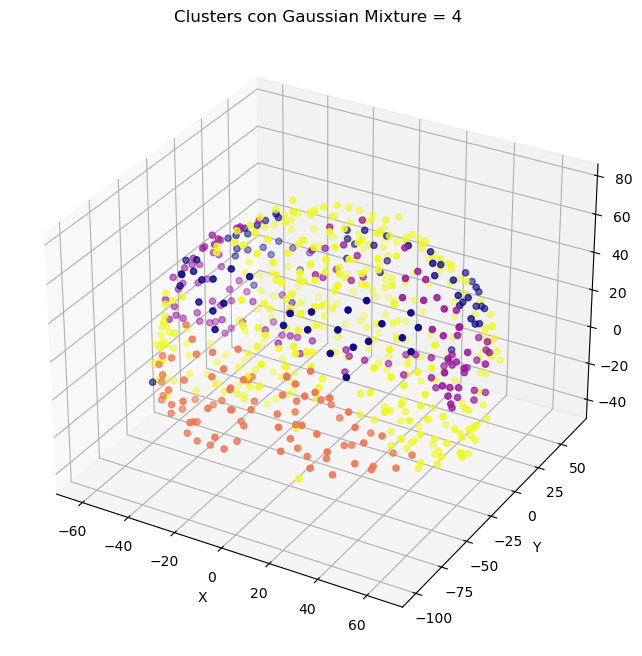

In [68]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=labels_gmm4, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters con Gaussian Mixture = 4')
plt.show()

In [70]:
gmm5 = GaussianMixture(n_components=n_clusters_optimo_5)
gmm5.fit(X_std)

labels_gmm5 = gmm5.predict(X_std)

C:\Users\holai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


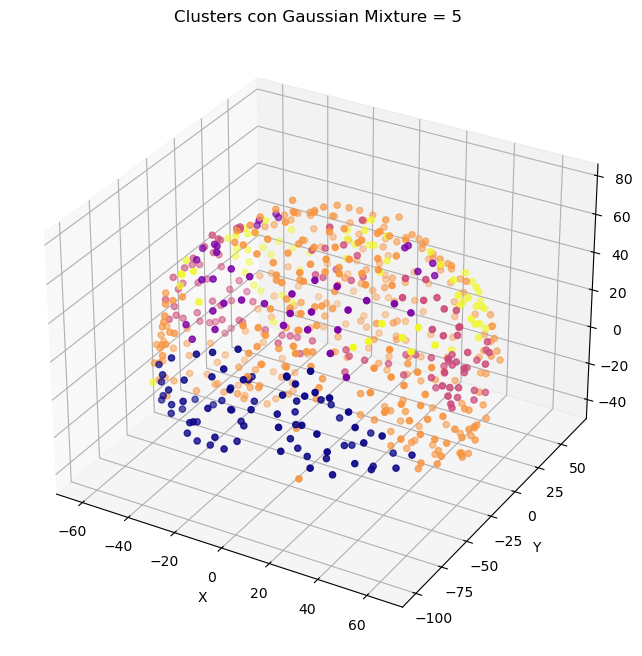

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Coord[:, 0], Coord[:, 1], Coord[:, 2], c=labels_gmm5, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Clusters con Gaussian Mixture = 5')
plt.show()

# 2. Brain tumor
* Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
* Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
* ¿Qué método recomendarías para este dataset?, ¿por qué?

### 2. A

In [78]:
path_brain = r"C:\Users\holai\OneDrive\Escritorio\Semestre 6\Modelos Computacionales II (F)\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
df_brain = pd.read_csv(path_brain)
df_brain

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [80]:
x = df_brain.iloc[:, 2:-1]
x_std_brain = StandardScaler().fit_transform(x)

In [90]:
inertia2 = []
for no_clusters in range(2, 15): 
    kmeans = KMeans(n_clusters=no_clusters, random_state=42)
    kmeans.fit(x_std_brain)
    inertia2.append(kmeans.inertia_)

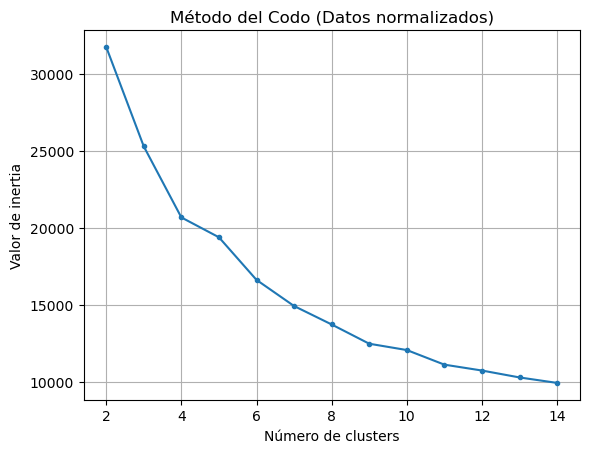

In [91]:
plt.plot(range(2, 15), inertia2, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del Codo (Datos normalizados)')
plt.grid(True)
plt.show()

In [122]:
print(df_brain.dtypes)

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object


In [124]:
df_brain_num = df_brain.select_dtypes(include=['float64', 'int64'])

In [126]:
inertia3 = []
for no_clusters in range(2, 15): 
    kmeans = KMeans(n_clusters=no_clusters, random_state=42)
    kmeans.fit(df_brain_num)
    inertia3.append(kmeans.inertia_)

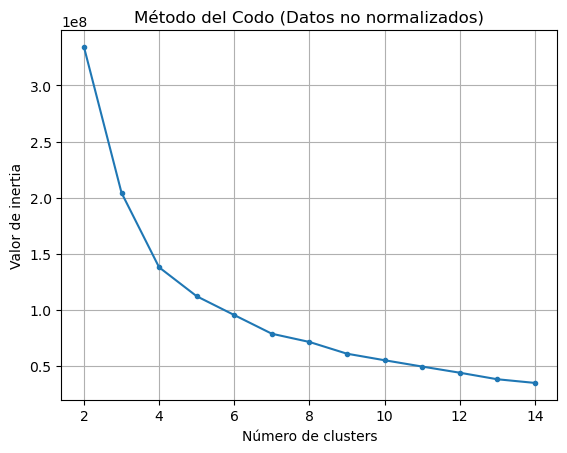

In [128]:
plt.plot(range(2, 15), inertia3, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del Codo (Datos no normalizados)')
plt.grid(True)
plt.show()

Según mi análisis visual el número de clústers óptimos sería 4 o 5, pero hasta donde yo tengo entendido el dataset de brain tumor solo se puede dividir en 2 porque sería positivo (sí hay tumor) o no negativo (no hay tumor) así que no estoy muy segura de que en este caso la inspección visual sea la mejor manera de determinar los clústers.

### 2. B

In [143]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(x_std_brain)

In [145]:
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(x_std_brain)

In [147]:
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(x_std_brain)

In [151]:
print("Confusión KMeans")
print(confusion_matrix(df_brain['Class'], labels_kmeans))

print("\nConfusión Gaussian Mixture")
print(confusion_matrix(df_brain['Class'], labels_gmm))

print("\nConfusión Jerárquico")
print(confusion_matrix(df_brain['Class'], labels_agglo))

Confusión KMeans
[[1978  101]
 [  80 1603]]

Confusión Gaussian Mixture
[[2056   23]
 [  60 1623]]

Confusión Jerárquico
[[  26 2053]
 [1589   94]]


In [153]:
ground_truth = df_brain['Class']

In [155]:
results_df = pd.DataFrame({
    'True_Class': ground_truth,
    'KMeans': labels_kmeans,
    'GMM': labels_gmm,
    'Hier': labels_agglo
})

In [158]:
def map_clusters_to_classes(cluster_labels, true_labels):
    cluster_classes = []
    for cluster in np.unique(cluster_labels):
        class_counts = np.bincount(true_labels[cluster_labels == cluster])
        cluster_classes.append(np.argmax(class_counts))  
    return {cluster: cluster_classes[i] for i, cluster in enumerate(np.unique(cluster_labels))}

In [160]:
def plot_simple_cm(true, pred, title):
    cm = confusion_matrix(true, pred, labels=np.unique(true))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()

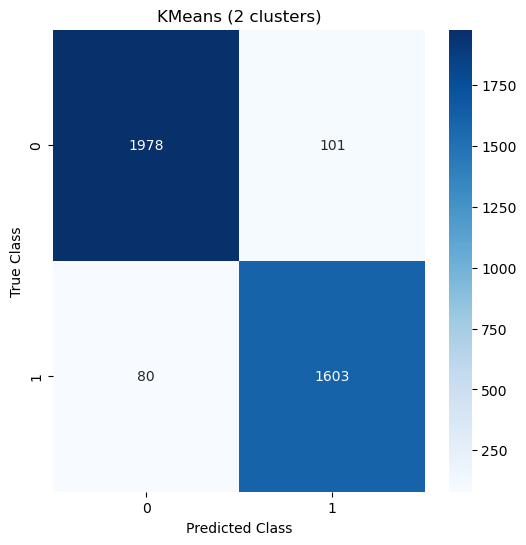

In [162]:
kmeans_map = map_clusters_to_classes(results_df['KMeans'], results_df['True_Class'])
results_df['KMeans_mapped'] = results_df['KMeans'].map(kmeans_map)
plot_simple_cm(results_df['True_Class'], results_df['KMeans_mapped'], 'KMeans (2 clusters)')

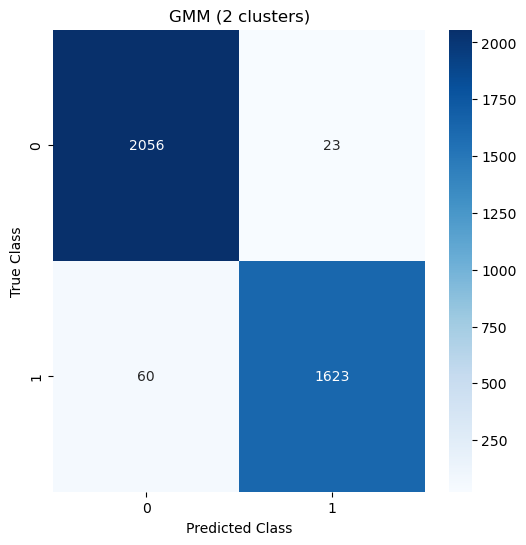

In [164]:
gmm_map = map_clusters_to_classes(results_df['GMM'], results_df['True_Class'])
results_df['GMM_mapped'] = results_df['GMM'].map(gmm_map)
plot_simple_cm(results_df['True_Class'], results_df['GMM_mapped'], 'GMM (2 clusters)')

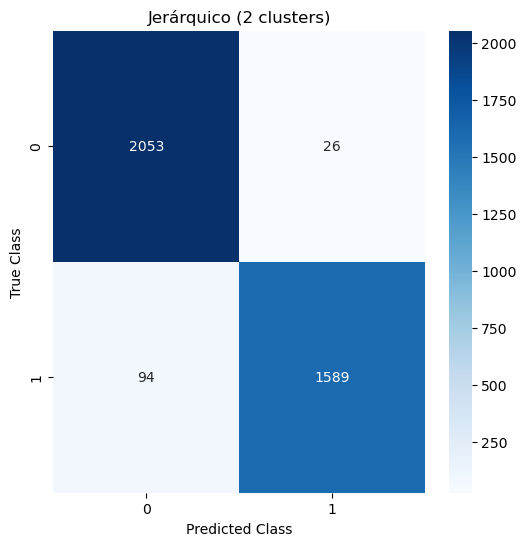

In [166]:
agglo_map = map_clusters_to_classes(results_df['Hier'], results_df['True_Class'])
results_df['Hier_mapped'] = results_df['Hier'].map(agglo_map)
plot_simple_cm(results_df['True_Class'], results_df['Hier_mapped'], 'Jerárquico (2 clusters)')

### 2. C

¿Qué método recomendarías para este dataset? ¿Por qué?
* Creo que el mejor sería el de Gaussian Mixture ya que tuvo muy pocos errores (solo 23 falsos positivos y 60 falsos negativos).
* A comparasión de K Means y clustering jerárquico que tuvieron 101 falsos positivos y 80 falsos negativos (en el caso de k means) y 26 falsos positivos y 94 falsos negativos (en el caso de clustering jerárquico).
* En orden quedarían:
  1. Gaussian Mixture
  2. Clustering jerárquico
  3. K means

# 3. De su previa investigación:
* ¿Qué es precision?
  * Capacidad del modelo para no clasificar como positivo a un negativo (o qué tan preciso es al predecir la clase positiva).
* ¿Qué es accuracy?
  * Proporción de predicciones correctas sobre todas las predicciones, es el porcentaje de veces que el modelo predijo correctamente.
* ¿Qué es recall?
  * Capacidad del modelo para encontrar todos los verdaderos positivos.
* ¿Qué es f1-score?
  * Media armónica de la precisión y el recall.
  * La media armónica se usa porque da más peso a los valores bajos, lo que significa que si uno de estos dos valores es bajo, el F1 score será más bajo también.
  * El F1 score es útil para medir el desempeño de un modelo cuando tienes clases desbalanceadas.

# 4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?
* Están directamente relacionadas porque cada métrica se calcula utilizando los valores de la matriz de confusión:
  * TP (Verdaderos Positivos) son los casos correctamente identificados como positivos.
  * FP (Falsos Positivos) son los casos incorrectamente identificados como positivos.
  * FN (Falsos Negativos) son los casos incorrectamente identificados como negativos.
  * TN (Verdaderos Negativos) son los casos correctamente identificados como negativos.
* Las medidas se relacionan de esta manera cada una:
  * Precision y Recall se basan en la relación entre TP, FP y FN.
  * Accuracy toma en cuenta TP, TN, FP y FN.
  * F1 Score combina Precisión y Recall, y por lo tanto también depende de TP, FP y FN.
* Cada una de estas métricas ayuda a evaluar el desempeño del modelo desde una perspectiva diferente, pero todas se basan en los valores derivados de la matriz de confusión.

# 5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [245]:
def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)  # Exactitud total
    precision = precision_score(true_labels, predicted_labels, average='binary')  # Precisión
    recall = recall_score(true_labels, predicted_labels, average='binary')  # Recall
    f1 = f1_score(true_labels, predicted_labels, average='binary')  # F1 score
    return accuracy, precision, recall, f1

In [247]:
kmeans_metrics = calculate_metrics(results_df['True_Class'], results_df['KMeans_mapped'])
gmm_metrics = calculate_metrics(results_df['True_Class'], results_df['GMM_mapped'])
hierarchical_metrics = calculate_metrics(results_df['True_Class'], results_df['Hier_mapped'])

In [251]:
print("Métricas para KMeans:")
print(f"Accuracy: {kmeans_metrics[0]}")
print(f"Precision: {kmeans_metrics[1]}")
print(f"Recall: {kmeans_metrics[2]}")
print(f"F1 Score: {kmeans_metrics[3]}")
print("\n")

print("Métricas para Gaussian Mixture:")
print(f"Accuracy: {gmm_metrics[0]}")
print(f"Precision: {gmm_metrics[1]}")
print(f"Recall: {gmm_metrics[2]}")
print(f"F1 Score: {gmm_metrics[3]}")
print("\n")

print("Métricas para Clustering Jerárquico:")
print(f"Accuracy: {hierarchical_metrics[0]}")
print(f"Precision: {hierarchical_metrics[1]}")
print(f"Recall: {hierarchical_metrics[2]}")
print(f"F1 Score: {hierarchical_metrics[3]}")

Métricas para KMeans:
Accuracy: 0.9518872939925571
Precision: 0.9407276995305164
Recall: 0.952465834818776
F1 Score: 0.9465603779155595


Métricas para Gaussian Mixture:
Accuracy: 0.9779372674109517
Precision: 0.9860267314702309
Recall: 0.964349376114082
F1 Score: 0.9750675878642235


Métricas para Clustering Jerárquico:
Accuracy: 0.9681020733652312
Precision: 0.9839009287925696
Recall: 0.9441473559120618
F1 Score: 0.9636143117040631
